**Importing the required libraries**

In [1]:

import pandas as pd
import numpy as np
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns

**Loading the datasets**

In [2]:
df1=pd.read_csv('Unemployment in India.csv')
df2=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

## Data Exploration

Data exploration is a crucial first step in data analysis that involves understanding and summarizing the main characteristics of a dataset, often using visual methods. It helps identify patterns, relationships, anomalies, and underlying structures within the data. This process typically includes:

- **Loading Data**: Importing datasets from various sources, such as databases, CSV files, or APIs.
- **Inspecting Data**: Examining the dataset's structure, such as the number of rows and columns, data types, and summary statistics.
- **Cleaning Data**: Handling missing values, correcting data types, and filtering out irrelevant or corrupted data.
- **Visualizing Data**: Creating plots, charts, and graphs to gain insights into the data distributions, trends, and outliers.
- **Identifying Relationships**: Exploring correlations between variables to understand how they interact with each other.

The ultimate goal of data exploration is to gain a clear and comprehensive understanding of the dataset, enabling more informed decisions for further analysis, modeling, and reporting.


In [3]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df2.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
print(f'{df1.info()} \n\n')
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------          

In [6]:
df2.drop(['longitude','latitude'], axis=1, inplace=True)  #Dropping coloumns not needed for this analysis
df2.head()  

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South


In [7]:
df1.columns = df1.columns.str.strip() #striping the unwanted whitespace in column names
df2.columns = df2.columns.str.strip()

#Renaming the columns for or access
df1.rename(columns={"Region":"States","Estimated Unemployment Rate (%)":"Unemployment Rate","Estimated Employed":"Employed", 
                   "Estimated Labour Participation Rate (%)":"Labour Participation Rate"}, inplace=True)

df2.rename(columns={"Region":"States","Estimated Unemployment Rate (%)":"Unemployment Rate","Estimated Employed":"Employed", 
                   "Estimated Labour Participation Rate (%)":"Labour Participation Rate","Region.1":"Region"}, inplace=True)

print(df1.columns)
print(df2.columns)

Index(['States', 'Date', 'Frequency', 'Unemployment Rate', 'Employed',
       'Labour Participation Rate', 'Area'],
      dtype='object')
Index(['States', 'Date', 'Frequency', 'Unemployment Rate', 'Employed',
       'Labour Participation Rate', 'Region'],
      dtype='object')


## Data Cleaning

Data cleaning, also known as data cleansing or data preprocessing, is the process of identifying and correcting errors, inconsistencies, and inaccuracies within a dataset to improve its quality and reliability. This step is essential before any data analysis or machine learning tasks. Key activities in data cleaning include:

- **Removing Duplicate Records**: Eliminating repeated entries that can skew analysis results.
- **Handling Missing Values**: Addressing gaps in data, either by removing records with missing values or imputing them with estimated values.
- **Correcting Inconsistent Data**: Standardizing data formats, such as date formats or text case, to ensure consistency.
- **Fixing Errors**: Identifying and correcting data entry mistakes, such as typos, outliers, or impossible values.
- **Validating Data**: Ensuring that the data meets certain criteria and constraints, like range or domain checks.

Data cleaning is a crucial step to ensure the accuracy and integrity of the data, leading to more reliable and meaningful analysis results.


In [8]:
print("Missing values in DataSet1 and its Percentage")
print(f'{df1.isnull().sum()} \n')  #Handling the missing data
df1_mv=(df1.isnull().sum()/len(df1))*100
print(df1_mv.apply(lambda x: f'{x:.0f}%'))

Missing values in DataSet1 and its Percentage
States                       28
Date                         28
Frequency                    28
Unemployment Rate            28
Employed                     28
Labour Participation Rate    28
Area                         28
dtype: int64 

States                       4%
Date                         4%
Frequency                    4%
Unemployment Rate            4%
Employed                     4%
Labour Participation Rate    4%
Area                         4%
dtype: object


In [9]:
print(df2.isnull().sum())

States                       0
Date                         0
Frequency                    0
Unemployment Rate            0
Employed                     0
Labour Participation Rate    0
Region                       0
dtype: int64


In [10]:
#Replacing the missing value with mean and mode 

#Filling missing values for numerical columns with mean and median
df1['Unemployment Rate'].fillna(df1['Unemployment Rate'].mean(), inplace=True)
df1['Employed'].fillna(df1['Employed'].median(), inplace=True)
df1['Labour Participation Rate'].fillna(df1['Labour Participation Rate'].mean(), inplace=True)

#Filling missing values for categorical columns with mode
df1['States'].fillna(df1['States'].mode()[0], inplace=True)
df1['Date'].fillna(df1['Date'].mode()[0], inplace=True)
df1['Frequency'].fillna(df1['Frequency'].mode()[0], inplace=True)
df1['Area'].fillna(df1['Area'].mode()[0], inplace=True)

In [11]:
print(f'{df1.isnull().sum()} \n')

States                       0
Date                         0
Frequency                    0
Unemployment Rate            0
Employed                     0
Labour Participation Rate    0
Area                         0
dtype: int64 



In [12]:
#Dropping duplicate columns 

print(f'Number of rows in df1:{df1.shape[0]}')
print(f'Number of rows in df2:{df2.shape[0]}')

print(f'Number of duplicate rows in df1: {df1.duplicated().sum()}')
print(f'Number of duplicate rows in df2: {df2.duplicated().sum()}')

df1.drop_duplicates(inplace=True)
print(f'Number of rows in df1 after dropping:{df1.shape[0]}')

Number of rows in df1:768
Number of rows in df2:267
Number of duplicate rows in df1: 27
Number of duplicate rows in df2: 0
Number of rows in df1 after dropping:741


In [13]:
#Type conversion of the columns to as we usuly know them 

#Befor conversion
print('Data Types of DataFrame1')
print(f'{df1.dtypes} \n' )

print('Data Types of DataFrame2')
print(df2.dtypes)

#conver Date column to DateTime 
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)

#convert object columns to type category
df1['States']=df1['States'].astype('category')
df1['Frequency']=df1['Frequency'].astype('category')
df1['Area']=df1['Area'].astype('category')

df2['States']=df2['States'].astype('category')
df2['Frequency']=df2['Frequency'].astype('category')
df2['Region']=df2['Region'].astype('category')


print('Data Types of DataFrame1')
print(f'{df1.dtypes} \n' )

print('Data Types of DataFrame2')
print(df2.dtypes)

Data Types of DataFrame1
States                        object
Date                          object
Frequency                     object
Unemployment Rate            float64
Employed                     float64
Labour Participation Rate    float64
Area                          object
dtype: object 

Data Types of DataFrame2
States                        object
Date                          object
Frequency                     object
Unemployment Rate            float64
Employed                       int64
Labour Participation Rate    float64
Region                        object
dtype: object
Data Types of DataFrame1
States                             category
Date                         datetime64[ns]
Frequency                          category
Unemployment Rate                   float64
Employed                            float64
Labour Participation Rate           float64
Area                               category
dtype: object 

Data Types of DataFrame2
States                      

In [19]:
# Define the cutoff date for COVID
cutoff_date = pd.to_datetime('2020-03-01')
df1['COVID_Period'] = df1['Date'].apply(lambda x: 'Pre-COVID' if x < cutoff_date else 'Post-COVID')
df2['COVID_Period'] = df2['Date'].apply(lambda x: 'Pre-COVID' if x < cutoff_date else 'Post-COVID')

# Unemployment Change Percentage
df1['Unemployment_Change'] = df1.groupby(['States'], observed=True)['Unemployment Rate'].pct_change() * 100
df2['Unemployment_Change'] = df2.groupby(['States'], observed=True)['Unemployment Rate'].pct_change() * 100

# Quarter Information
df1['Quarter'] = df1['Date'].dt.to_period('Q')
df2['Quarter'] = df2['Date'].dt.to_period('Q')

# Employment Growth Rate
df1['Employment_Growth'] = df1.groupby(['States'], observed=True)['Employed'].pct_change() * 100
df2['Employment_Growth'] = df2.groupby(['States'], observed=True)['Employed'].pct_change() * 100

# Regional Aggregation
regional_summary = df2.groupby('Region', observed=True)[['Unemployment Rate', 'Labour Participation Rate']].mean().reset_index()

# Seasonal Flags
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
df1['Season'] = df1['Date'].dt.month.apply(get_season)
df2['Season'] = df2['Date'].dt.month.apply(get_season)


## Features Added

- **COVID Period Flag**: Classify data into pre-COVID and post-COVID periods.
- **Unemployment Change Percentage**: Calculate the percentage change in unemployment rates for each state compared to the previous observation.
- **Quarter Information**: Identify the quarter for each record (Q1, Q2, Q3, Q4).
- **Employment Growth Rate**: Calculate employment growth as a percentage change in the number of employed people.
- **Regional Aggregation**: Aggregate data by region and calculate mean unemployment and labor participation rates for each region.
- **Seasonal Flags**: Add a season column based on the month.


In [20]:
df1.head()

,States,Date,Frequency,Unemployment Rate,Employed,Labour Participation Rate,Area,COVID_Period,Unemployment_Change,Quarter,Employment_Growth,Season
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,Pre-COVID,NaN,2019Q2,NaN,Spring
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,Pre-COVID,-16.438356,2019Q2,-2.027295,Summer
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,Pre-COVID,22.950820,2019Q3,2.814132,Summer
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,Pre-COVID,-11.466667,2019Q3,1.646321,Summer
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,Pre-COVID,55.722892,2019Q3,-0.235485,Autumn


In [21]:
df2.head()


,States,Date,Frequency,Unemployment Rate,Employed,Labour Participation Rate,Region,COVID_Period,Unemployment_Change,Quarter,Employment_Growth,Season
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,Pre-COVID,NaN,2020Q1,NaN,Winter
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,Pre-COVID,6.386861,2020Q1,-0.540307,Winter
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,Post-COVID,-0.686106,2020Q1,-4.015889,Spring
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,Post-COVID,254.231434,2020Q2,-28.614254,Spring
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,Post-COVID,-15.017065,2020Q2,14.571288,Spring


In [22]:
df1.head()


,States,Date,Frequency,Unemployment Rate,Employed,Labour Participation Rate,Area,COVID_Period,Unemployment_Change,Quarter,Employment_Growth,Season
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,Pre-COVID,NaN,2019Q2,NaN,Spring
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,Pre-COVID,-16.438356,2019Q2,-2.027295,Summer
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,Pre-COVID,22.950820,2019Q3,2.814132,Summer
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,Pre-COVID,-11.466667,2019Q3,1.646321,Summer
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,Pre-COVID,55.722892,2019Q3,-0.235485,Autumn


In [23]:
df2.head()

,States,Date,Frequency,Unemployment Rate,Employed,Labour Participation Rate,Region,COVID_Period,Unemployment_Change,Quarter,Employment_Growth,Season
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,Pre-COVID,NaN,2020Q1,NaN,Winter
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,Pre-COVID,6.386861,2020Q1,-0.540307,Winter
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,Post-COVID,-0.686106,2020Q1,-4.015889,Spring
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,Post-COVID,254.231434,2020Q2,-28.614254,Spring
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,Post-COVID,-15.017065,2020Q2,14.571288,Spring


ANALYSIS AND INSIGHTS

In [24]:
#Average Unemployment Rate Pre- and Post-COVID
covid_comparison = df1.groupby('COVID_Period')['Unemployment Rate'].mean().reset_index()
print(covid_comparison)

  COVID_Period  Unemployment Rate
0   Post-COVID          17.774363
1    Pre-COVID           9.513776


In [25]:
#State-Level Changes in Unemployment
state_comparison = df1.groupby(['States', 'COVID_Period'], observed=True)['Unemployment Rate'].mean().unstack()
state_comparison['Change'] = state_comparison['Post-COVID'] - state_comparison['Pre-COVID']

print('Unemployment Rate in different states pre/post COVID')
print()
print(state_comparison)

Unemployment Rate in different states pre/post COVID

COVID_Period      Post-COVID  Pre-COVID     Change
States                                            
Andhra Pradesh     13.576250   5.358950   8.217300
Assam               6.578571   6.372632   0.205940
Bihar              31.631250  13.833000  17.798250
Chandigarh         14.325000  16.325000  -2.000000
Chhattisgarh       13.075000   7.706500   5.368500
Delhi              22.157500  14.230500   7.927000
Goa                13.107500   8.507500   4.600000
Gujarat            10.383750   5.176000   5.207750
Haryana            34.652500  22.935500  11.717000
Himachal Pradesh   17.068750  19.129000  -2.060250
Jammu & Kashmir    12.888000  17.220000  -4.332000
Jharkhand          36.348750  14.279500  22.069250
Karnataka          15.280000   3.234500  12.045500
Kerala             17.952500   6.992500  10.960000
Madhya Pradesh     14.070000   4.741000   9.329000
Maharashtra        13.026250   5.370000   7.656250
Meghalaya           7.072857

In [26]:
# Finding the mean unemployment rate for each state
state_unemployment = df1.groupby(('States'), observed=True)['Unemployment Rate'].mean().reset_index()

# Sorting states by unemployment rate in descending order
state_unemployment_sorted = state_unemployment.sort_values(by='Unemployment Rate', ascending=False)

# Selecting the top 5 states
top_5_states = state_unemployment_sorted.head(5)
print('Top 5 States with highest Unemployment Rate')
print(top_5_states)

Top 5 States with highest Unemployment Rate
              States  Unemployment Rate
24           Tripura          28.350357
8            Haryana          26.283214
11         Jharkhand          20.585000
2              Bihar          18.918214
9   Himachal Pradesh          18.540357


In [27]:
#Employment Growth by Region
employment_growth = df2.groupby(['Region'],observed=True)['Employment_Growth'].mean().reset_index()
print(employment_growth)

      Region  Employment_Growth
0       East           2.983646
1      North           0.334118
2  Northeast           1.703069
3      South           4.062679
4       West           1.094511


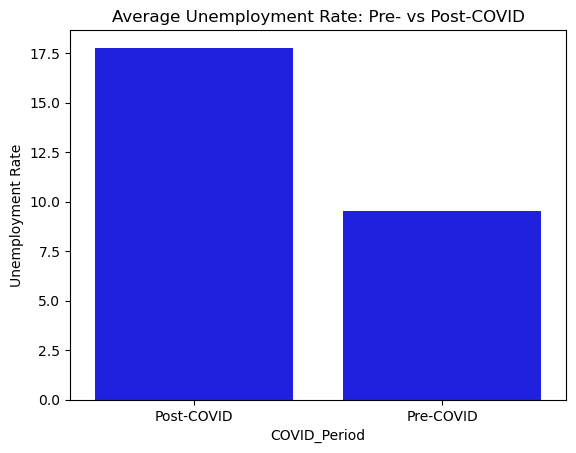

In [28]:
#Pre- vs Post-COVID Unemployment Rates
sns.barplot(data=covid_comparison, x='COVID_Period', y='Unemployment Rate', color='blue')
plt.title('Average Unemployment Rate: Pre- vs Post-COVID')
plt.show()

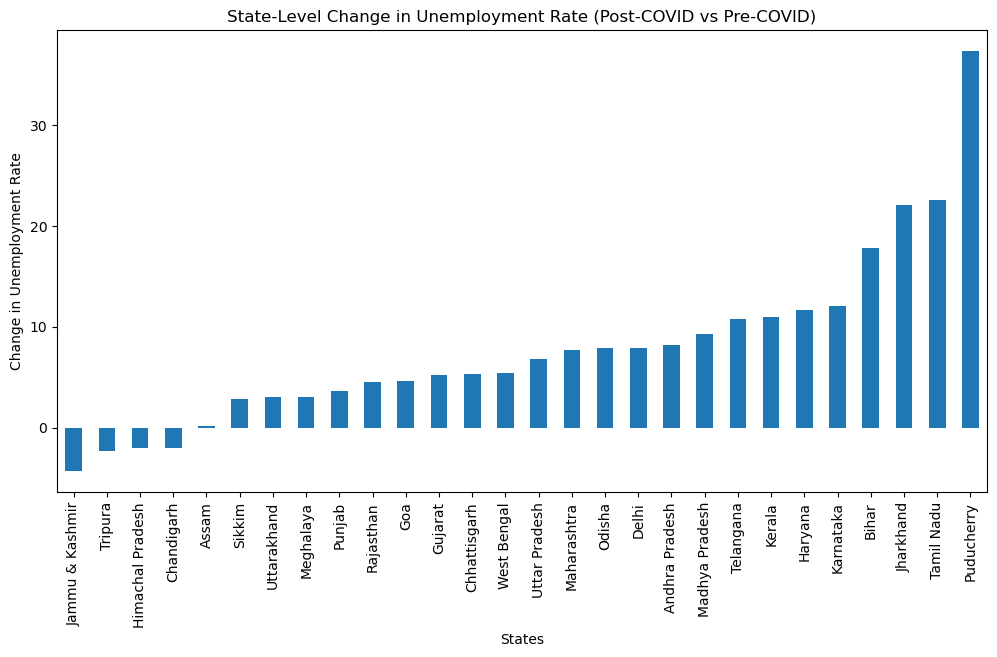

In [29]:
#State-Level Unemployment Changes
state_comparison['Change'].sort_values().plot(kind='bar', figsize=(12, 6))
plt.title('State-Level Change in Unemployment Rate (Post-COVID vs Pre-COVID)')
plt.ylabel('Change in Unemployment Rate')
plt.show()

D:\LLM\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


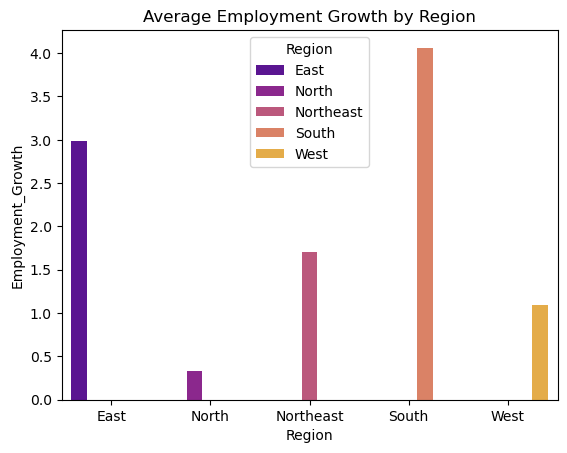

In [32]:
#Employment Growth by Region
sns.barplot(data=employment_growth, x='Region', y='Employment_Growth', hue='Region', palette='plasma')
plt.title('Average Employment Growth by Region')
plt.legend(title='Region')  # Add the legend with the title
plt.show()

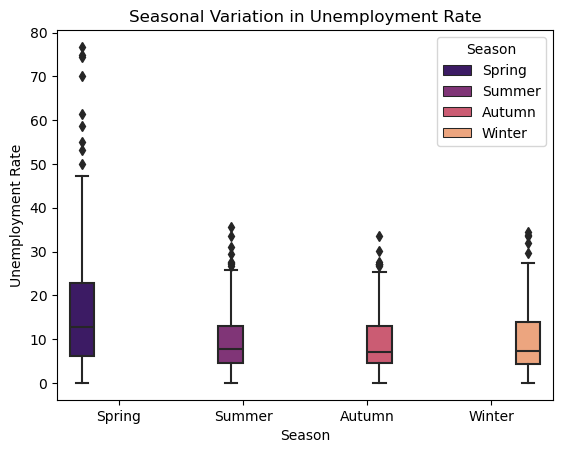

In [34]:
#Seasonal Analysis of Unemployment Rate
sns.boxplot(data=df1, x='Season', y='Unemployment Rate', hue='Season', palette='magma')
plt.title('Seasonal Variation in Unemployment Rate')
plt.legend(title='Season')
plt.show()

## Analysis and Insights

### Unemployment Rate Trends

The analysis of the unemployment rate in India before and after the onset of COVID-19 reveals significant trends:

1. **Pre-COVID Period**:
   - **Stable Unemployment Rates**: Prior to March 2020, the unemployment rates were relatively stable with minor fluctuations. Various states showed consistent employment growth trends and a gradual increase in labor force participation.

2. **Post-COVID Period**:
   - **Sharp Increase in Unemployment**: Post-March 2020, there was a notable surge in unemployment rates across multiple states due to the economic impact of the pandemic. Industries such as hospitality, retail, and travel were particularly affected.
   - **Recovery Patterns**: By late 2020 and early 2021, there were signs of recovery as restrictions were lifted and economic activities resumed. However, the pace of recovery varied significantly across states.

### Regional Disparities

- **Urban vs Rural Impact**: The unemployment impact was more pronounced in urban areas compared to rural regions, owing to the higher concentration of service-based industries in cities.
- **Regional Variations**: States with diversified economies demonstrated better resilience and quicker recovery compared to those heavily reliant on specific sectors.

### Employment Growth and Sectoral Shifts

- **Shift Towards Informal Employment**: Post-pandemic recovery saw a rise in informal employment as individuals sought alternative means of livelihood.
- **Sectoral Employment Growth**: Sectors such as information technology, e-commerce, and healthcare showed positive growth, absorbing some of the workforce displaced from other industries.

### Quarterly and Seasonal Analysis

- **Quarterly Trends**: Data analysis at the quarterly level highlighted the immediate impact of lockdowns and subsequent recovery phases. There was a marked decline in employment during Q2 2020, followed by gradual improvement in subsequent quarters.
- **Seasonal Variations**: Seasonal analysis indicated that certain periods, such as summer and monsoon, witnessed higher unemployment rates due to the disruption of agricultural activities and seasonal businesses.

### Policy Implications

- **Government Interventions**: The analysis underscores the importance of targeted government interventions to support affected industries and regions. Initiatives aimed at upskilling and reskilling the workforce can help in mitigating the long-term impact of the pandemic.
- **Economic Diversification**: Encouraging economic diversification and investing in emerging sectors can enhance resilience against future shocks.

### Conclusion

The analysis provides a comprehensive overview of the unemployment dynamics in India before and after COVID-19. Understanding these trends is crucial for formulating effective policies and strategies to foster sustainable economic recovery and growth.
